1.What is the mean Stars ?


2.What is the maximum price?


3.What is the maximum Rating?


4.What is the average price?


5.What is the distribution of stars?


6.Is there a correlation between price and star ?


7.Is there a correlation between price and rating?


8.How is the distribution of product ratings across different price ranges?


9.How does the average rating vary across different price ranges?


10.What is the name of the item with the highest price in the dataset?


11.What is the name of the item with the highest rating in the dataset?


In [1]:
import seaborn as sns
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# WEB SCRAPPING

In [2]:

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
with open('amazon.csv', mode = 'w', newline = '', encoding = 'utf-8') as file:

    writer = csv.writer(file)
    writer.writerow(['Name' , 'Price' , 'Rating' , 'Stars' ])

    for page in range(1, 550):
        
        url = f"https://www.amazon.eg/s?k= {page}"

        response = requests.get ( url, headers=headers )
        soup = BeautifulSoup (response.content, 'html.parser')
        elements = soup.find_all("div", {"class": "s-result-item"})

        for element in elements :

            name_element = element.find("span", {"class": "a-text-normal"})
            name = name_element.text.strip() if name_element else ""

            price_element = element.find("span", {"class": "a-price-whole"})
            price = price_element.text.strip() if price_element else ""
            
            rating_element = element.find("span", {"class": "a-size-base"})
            rating = rating_element.text.strip() if rating_element else ""

            stars_element = element.find("span", {"class": "a-icon-alt"})
            stars = stars_element.text.strip() if stars_element else ""

            writer.writerow([name, price, rating, stars])


In [3]:
df=pd.read_csv('amazon.csv')
df.head()

,Name,Price,Rating,Stars
0,تحقّق من صفحة كل منتج من أجل خيارات الشراء الأ...,NaN,تحقّق من صفحة كل منتج من أجل خيارات الشراء الأ...,NaN
1,هاتف ذكي ريلمي 11 ثنائي شرائح الاتصال، الجيل ا...,"9,490.‎",24,3.8 من 5 نجوم
2,موبايل ريلمي 11 ثنائي شرائح الاتصال، الجيل الخ...,"11,299.‎",65,4.1 من 5 نجوم
3,موبايل ريدمي نوت 11 بشريحتين اتصال، 4G LTE، را...,"7,499.‎","8,018",4.7 من 5 نجوم
4,NaN,NaN,NaN,NaN


In [4]:
df.shape


(2343, 4)

# Missing Rows

In [5]:
df = pd.read_csv('amazon.csv')
df = df.dropna(thresh=df.shape[1]-2)
df.to_csv('amazon.csv2', index=False)

In [6]:
df.shape

(2182, 4)

# duplicating


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
5       False
        ...  
2336    False
2337    False
2338    False
2339    False
2340    False
Length: 2182, dtype: bool

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(2085, 4)

# Cleaing

In [10]:
df['Price'].unique()


array([nan, '9,490.\u200e', '11,299.\u200e', '7,499.\u200e',
       '17,999.\u200e', '89.\u200e', '9,888.\u200e', '14,999.\u200e',
       '8,599.\u200e', '6,820.\u200e', '6,999.\u200e', '67.\u200e',
       '98.\u200e', '5,999.\u200e', '16,799.\u200e', '111.\u200e',
       '62.\u200e', '7,490.\u200e', '46.\u200e', '8,799.\u200e',
       '140.\u200e', '7,050.\u200e', '120.\u200e', '45.\u200e',
       '16,350.\u200e', '3,699.\u200e', '16,390.\u200e', '12,995.\u200e',
       '693.\u200e', '439.\u200e', '499.\u200e', '2,100.\u200e',
       '399.\u200e', '265.\u200e', '649.\u200e', '1,700.\u200e',
       '195.\u200e', '135.\u200e', '3,950.\u200e', '7,430.\u200e',
       '35,900.\u200e', '37,499.\u200e', '5,799.\u200e', '30,359.\u200e',
       '5,480.\u200e', '58.\u200e', '550.\u200e', '175.\u200e',
       '1,200.\u200e', '6,299.\u200e', '37,999.\u200e', '8,099.\u200e',
       '40,693.\u200e', '105.\u200e', '8,499.\u200e', '299.\u200e',
       '19,790.\u200e', '1,000.\u200e', '285.\u200e', '2

In [11]:
df = df.replace('\.\u200e', '', regex=True)
df['Price'].unique()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_4012\2159987517.py:1: SyntaxWarning: invalid escape sequence '\.'
  df = df.replace('\.\u200e', '', regex=True)


array([nan, '9,490', '11,299', '7,499', '17,999', '89', '9,888', '14,999',
       '8,599', '6,820', '6,999', '67', '98', '5,999', '16,799', '111',
       '62', '7,490', '46', '8,799', '140', '7,050', '120', '45',
       '16,350', '3,699', '16,390', '12,995', '693', '439', '499',
       '2,100', '399', '265', '649', '1,700', '195', '135', '3,950',
       '7,430', '35,900', '37,499', '5,799', '30,359', '5,480', '58',
       '550', '175', '1,200', '6,299', '37,999', '8,099', '40,693', '105',
       '8,499', '299', '19,790', '1,000', '285', '229', '5,390', '6,200',
       '4,099', '999', '350', '1,599', '19,400', '5,319', '464', '380',
       '270', '8,990', '249', '99', '115', '64,999', '59,999', '1,708',
       '33,999', '54,999', '44,999', '2,499', '53,999', '4,450', '56,999',
       '19,000', '38,499', '39,999', '61', '159', '156', '69', '80', '70',
       '150', '160', '125', '3,037', '24,999', '2,025', '75,999', '5,906',
       '2,080', '3,400', '2,909', '2,668', '4,375', '4,100', '1

In [12]:
for price in df['Price'].unique():
    print(price)


nan
9,490
11,299
7,499
17,999
89
9,888
14,999
8,599
6,820
6,999
67
98
5,999
16,799
111
62
7,490
46
8,799
140
7,050
120
45
16,350
3,699
16,390
12,995
693
439
499
2,100
399
265
649
1,700
195
135
3,950
7,430
35,900
37,499
5,799
30,359
5,480
58
550
175
1,200
6,299
37,999
8,099
40,693
105
8,499
299
19,790
1,000
285
229
5,390
6,200
4,099
999
350
1,599
19,400
5,319
464
380
270
8,990
249
99
115
64,999
59,999
1,708
33,999
54,999
44,999
2,499
53,999
4,450
56,999
19,000
38,499
39,999
61
159
156
69
80
70
150
160
125
3,037
24,999
2,025
75,999
5,906
2,080
3,400
2,909
2,668
4,375
4,100
1,999
10,251
4,318
60,999
8,900
31,499
2,279
79,999
1,562
1,010
209
438
1,837
252
4,999
1,740
590
295
275
20,331
1,594
273
432
950
1,799
1,706
599
232
944
1,450
329
539
409
900
319
344
216
1,495
199
1,207
245
369
2,640
1,499
1,160
1,588
128
116
110
220
85
106
166
95
74
71
92
77
144
395
66
239
132
1,225
1,244
240
309
325
130
444
1,984
107
148
775
96
300
100
235
88
250
172
359
84
180
179
254
90
360
349
225
178
208
47
56


In [13]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2340
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2085 non-null   object 
 1   Price   1464 non-null   float64
 2   Rating  1624 non-null   object 
 3   Stars   986 non-null    object 
dtypes: float64(1), object(3)
memory usage: 81.4+ KB


# Handling Reviews

In [14]:
df['Rating'].unique()

array(['تحقّق من صفحة كل منتج من أجل خيارات الشراء الأخرى.', '24', '65',
       '8,018', '137', '575', '479', '618', '32', '89', '55', '475', '5',
       '24,248', '80', '4', '68', '50', '585', '3', nan, '51', '58', '84',
       '12', '498', '2', '72', '12,312', '9,988', '95',
       'تبقى 2 فقط - اطلبه الآن.', '748', 'من', '1,191', '73', '1', '9',
       '83', '60',
       'تحقّق من صفحة كل منتج من أجل خيارات الشراء الأخرى. قد يختلف السعر والتفاصيل الأخرى حسب مقاس المنتج ولونه.',
       '103', '130', '57', '64', '225', '36', '97', '304', '177', '26',
       '930', '270', '38', '11', '62', '199', '20', '257', '243', '15',
       '23', '6', '18', '131', 'تبقى 1 فقط - اطلبه الآن.', '92', '2,919',
       '607', 'تبقى 4 فقط - اطلبه الآن.', '14,330', 'سعر القائمة:', '764',
       '14', '1,448', '8', '656', '17', '44', 'سعر البيع:', '206',
       '1,467', '3,143', '33,460', '1,951', '1,276', '286', '248', '129',
       '35', '352', '143', '84,095', '165', '16', '393', '99', '21', '22',
     

In [15]:
for review in df['Rating'].unique():
    print(review)

تحقّق من صفحة كل منتج من أجل خيارات الشراء الأخرى.
24
65
8,018
137
575
479
618
32
89
55
475
5
24,248
80
4
68
50
585
3
nan
51
58
84
12
498
2
72
12,312
9,988
95
تبقى 2 فقط - اطلبه الآن.
748
من
1,191
73
1
9
83
60
تحقّق من صفحة كل منتج من أجل خيارات الشراء الأخرى. قد يختلف السعر والتفاصيل الأخرى حسب مقاس المنتج ولونه.
103
130
57
64
225
36
97
304
177
26
930
270
38
11
62
199
20
257
243
15
23
6
18
131
تبقى 1 فقط - اطلبه الآن.
92
2,919
607
تبقى 4 فقط - اطلبه الآن.
14,330
سعر القائمة:
764
14
1,448
8
656
17
44
سعر البيع:
206
1,467
3,143
33,460
1,951
1,276
286
248
129
35
352
143
84,095
165
16
393
99
21
22
10
41
271
724
86
88
2,294
37
28
46
71
خيارات أخرى للشراء
617
قد تختلف الأسعار والتفاصيل الأخرى حسب حجم المنتج ولونه.
1,624
كان
126
266
669
40
301
29
7
3,156
38,581
74
33
كان:
3,360
157
2,222
309
290
47
45
1,146
1,436
133
322
78
11,723
67
56
19
39
106
124
478
132
48,704
17,999
11,492
40,773
933
4,480
1,285
26,664
74,931
151,384
1,249
14,744
159
82
12,131
81
30,139
67,405
43
20,150
3,150
1,371
46,

In [16]:
df['Rating'].unique()
for review in df['Rating'].unique():
    print(review)

تحقّق من صفحة كل منتج من أجل خيارات الشراء الأخرى.
24
65
8,018
137
575
479
618
32
89
55
475
5
24,248
80
4
68
50
585
3
nan
51
58
84
12
498
2
72
12,312
9,988
95
تبقى 2 فقط - اطلبه الآن.
748
من
1,191
73
1
9
83
60
تحقّق من صفحة كل منتج من أجل خيارات الشراء الأخرى. قد يختلف السعر والتفاصيل الأخرى حسب مقاس المنتج ولونه.
103
130
57
64
225
36
97
304
177
26
930
270
38
11
62
199
20
257
243
15
23
6
18
131
تبقى 1 فقط - اطلبه الآن.
92
2,919
607
تبقى 4 فقط - اطلبه الآن.
14,330
سعر القائمة:
764
14
1,448
8
656
17
44
سعر البيع:
206
1,467
3,143
33,460
1,951
1,276
286
248
129
35
352
143
84,095
165
16
393
99
21
22
10
41
271
724
86
88
2,294
37
28
46
71
خيارات أخرى للشراء
617
قد تختلف الأسعار والتفاصيل الأخرى حسب حجم المنتج ولونه.
1,624
كان
126
266
669
40
301
29
7
3,156
38,581
74
33
كان:
3,360
157
2,222
309
290
47
45
1,146
1,436
133
322
78
11,723
67
56
19
39
106
124
478
132
48,704
17,999
11,492
40,773
933
4,480
1,285
26,664
74,931
151,384
1,249
14,744
159
82
12,131
81
30,139
67,405
43
20,150
3,150
1,371
46,

In [17]:

df['Rating']=pd.to_numeric(df['Rating'],errors='coerce')
df['Rating'].unique()

array([ nan,  24.,  65., 137., 575., 479., 618.,  32.,  89.,  55., 475.,
         5.,  80.,   4.,  68.,  50., 585.,   3.,  51.,  58.,  84.,  12.,
       498.,   2.,  72.,  95., 748.,  73.,   1.,   9.,  83.,  60., 103.,
       130.,  57.,  64., 225.,  36.,  97., 304., 177.,  26., 930., 270.,
        38.,  11.,  62., 199.,  20., 257., 243.,  15.,  23.,   6.,  18.,
       131.,  92., 607., 764.,  14.,   8., 656.,  17.,  44., 206., 286.,
       248., 129.,  35., 352., 143., 165.,  16., 393.,  99.,  21.,  22.,
        10.,  41., 271., 724.,  86.,  88.,  37.,  28.,  46.,  71., 617.,
       126., 266., 669.,  40., 301.,  29.,   7.,  74.,  33., 157., 309.,
       290.,  47.,  45., 133., 322.,  78.,  67.,  56.,  19.,  39., 106.,
       124., 478., 132., 933., 159.,  82.,  81.,  43., 892.,  13., 215.,
       311.,  27.,  69., 807., 603., 249.,  42., 141.,  94., 197., 110.,
       155., 104.,  25., 466., 139., 752., 241., 223., 383., 173., 389.,
       369., 255.,  66., 151., 463.,  63., 195.,  5

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2340
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2085 non-null   object 
 1   Price   1464 non-null   float64
 2   Rating  861 non-null    float64
 3   Stars   986 non-null    object 
dtypes: float64(2), object(2)
memory usage: 81.4+ KB


# Handling Reviews Stars

In [19]:
df = df.replace('من 5 نجوم', '', regex=True)
df['Stars'].unique()
for star in df['Stars'].unique():
    print(star)
df['Stars']=pd.to_numeric(df['Stars'],errors='coerce')

nan
3.8 
4.1 
4.7 
4.0 
3.9 
4.5 
3.7 
4.2 
4.3 
3.6 
5.0 
3.3 
3.5 
1.0 
4.4 
4.8 
4.6 
3.2 
2.5 
3.4 
4.9 
3.0 
2.9 
3.1 
2.4 
1.7 
1.6 
2.2 
2.8 
1.5 
2.3 
2.1 
2.7 
2.0 
2.6 


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2340
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2085 non-null   object 
 1   Price   1464 non-null   float64
 2   Rating  861 non-null    float64
 3   Stars   986 non-null    float64
dtypes: float64(3), object(1)
memory usage: 81.4+ KB


# Handling Missing Values

In [21]:
df.isnull().sum()

Name         0
Price      621
Rating    1224
Stars     1099
dtype: int64

In [22]:
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Stars'].fillna(df['Stars'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_4012\1651155704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4012\1651155704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [23]:
df.isnull().sum()

Name      0
Price     0
Rating    0
Stars     0
dtype: int64

# Outliers

In [24]:
df.describe()

,Price,Rating,Stars
count,2085.000000,2085.000000,2085.000000
mean,275.548497,86.518002,4.056389
std,203.351327,112.628542,0.567669
min,14.000000,1.000000,1.000000
25%,120.000000,28.000000,4.056389
50%,275.548497,86.518002,4.056389
75%,275.548497,86.518002,4.200000
max,999.000000,978.000000,5.000000


#Outliers----->Stars

<Axes: ylabel='Stars'>

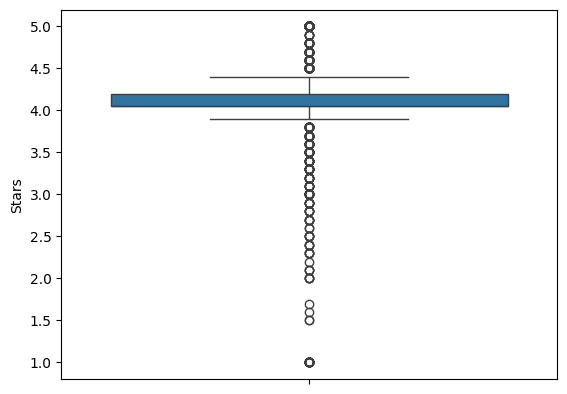

In [25]:
sns.boxplot(df['Stars'])

# Outliers----->Rating

In [26]:
#df['Rating'].describe()

In [27]:
#sns.boxplot(df['Rating'])

In [28]:
'''
q1=df['Rating'].quantile(0.25)
q3=df['Rating'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr
'''

"\nq1=df['Rating'].quantile(0.25)\nq3=df['Rating'].quantile(0.75)\niqr=q3-q1\nq1,q3,iqr\n"

In [29]:
'''
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit
'''

'\nupper_limit=q3+(1.5*iqr)\nlower_limit=q1-(1.5*iqr)\nlower_limit,upper_limit\n'

In [30]:
"""
df.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]
median_value = df['Rating'].median()
outlier_rows = df.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]
df.loc[outlier_rows.index, 'Rating'] = median_value
df.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]
"""

"\ndf.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]\nmedian_value = df['Rating'].median()\noutlier_rows = df.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]\ndf.loc[outlier_rows.index, 'Rating'] = median_value\ndf.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]\n"

In [31]:
#sns.boxplot(df['Rating'])

In [32]:
#df['Rating'].describe()

# Question

1. What is the mean Stars ?

In [33]:
stars = df['Stars'].mean()
print(stars)

4.056389452332658


2. What is the maximum price?

In [34]:
price = df['Price'].max()
print(price)

999.0


3. What is the maximum Rating?

In [35]:
rating = df['Rating'].max()
print(rating)

978.0


4. What is the average price?


Average Price: 275.54849726775956


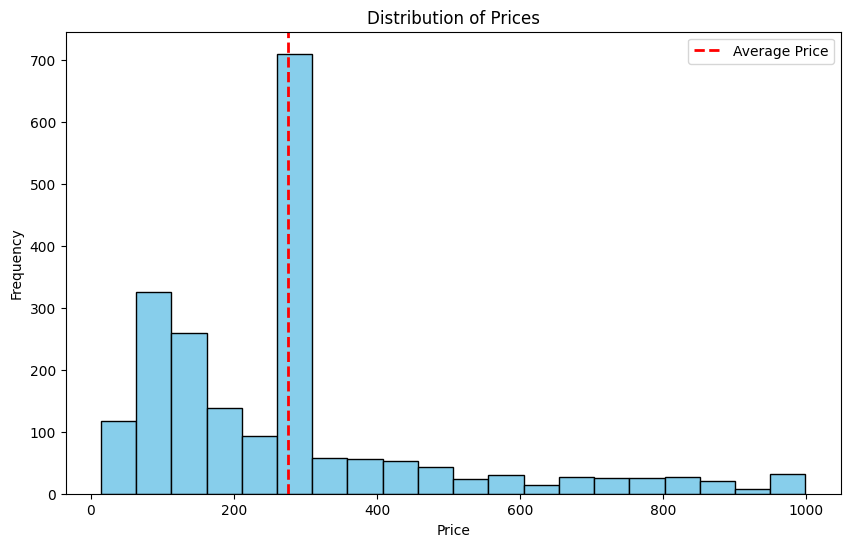

In [36]:
average_price = df['Price'].mean()
print("Average Price:", average_price)
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.axvline(average_price, color='red', linestyle='--', linewidth=2, label='Average Price')
plt.legend()
plt.show()

5. What is the distribution of stars?

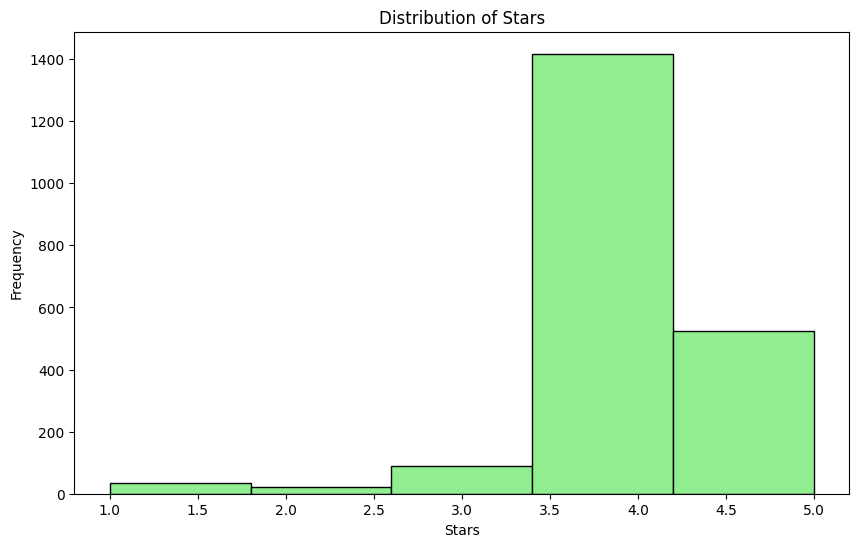

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df['Stars'], bins=5, color='lightgreen', edgecolor='black')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')
plt.show()


6. Is there a correlation between price and star ?

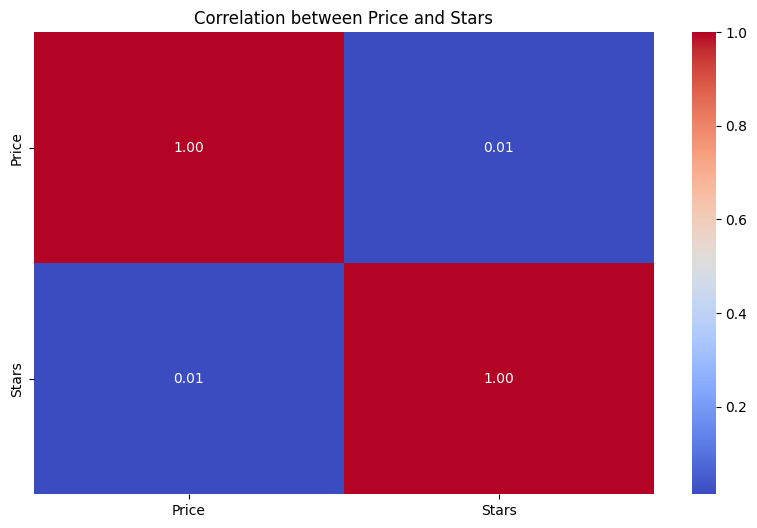

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Stars']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price and Stars')
plt.show()

7. Is there a correlation between price and rating?

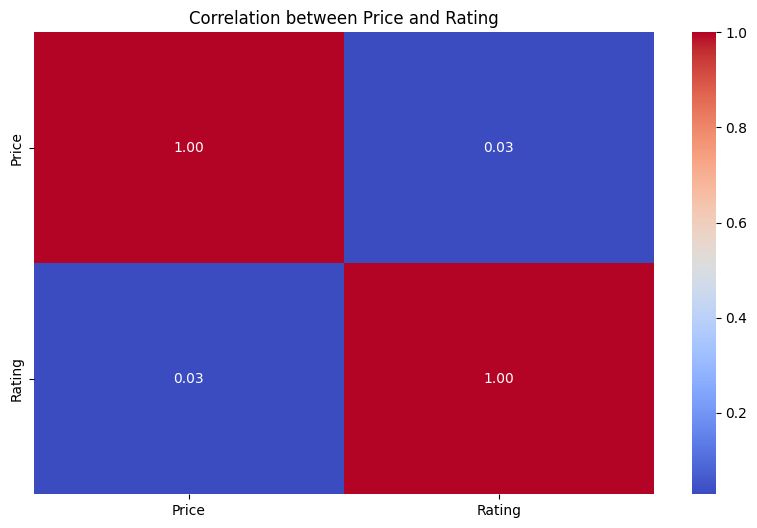

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Rating']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price and Rating')
plt.show()

8.How is the distribution of product ratings across different price ranges?


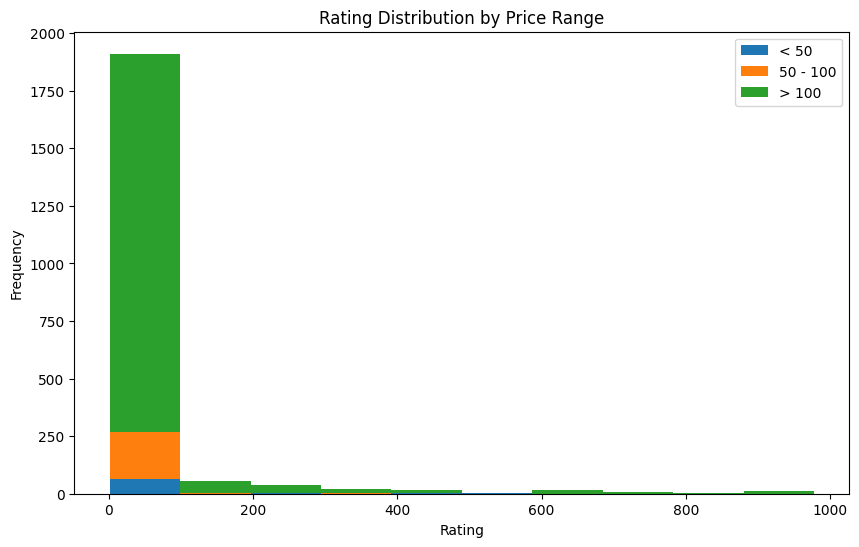

In [40]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['Price'] < 50]['Rating'], df[(df['Price'] >= 50) & (df['Price'] < 100)]['Rating'], df[df['Price'] >= 100]['Rating']], bins=10, stacked=True, label=['< 50', '50 - 100', '> 100'])
plt.legend()
plt.title('Rating Distribution by Price Range')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

9.How does the average rating vary across different price ranges?


C:\Users\User\AppData\Local\Temp\ipykernel_4012\1607938629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price_range = df.groupby(pd.cut(df['Price'], bins=[0, 50, 100, float('inf')]))['Rating'].mean()


275.54849726775956


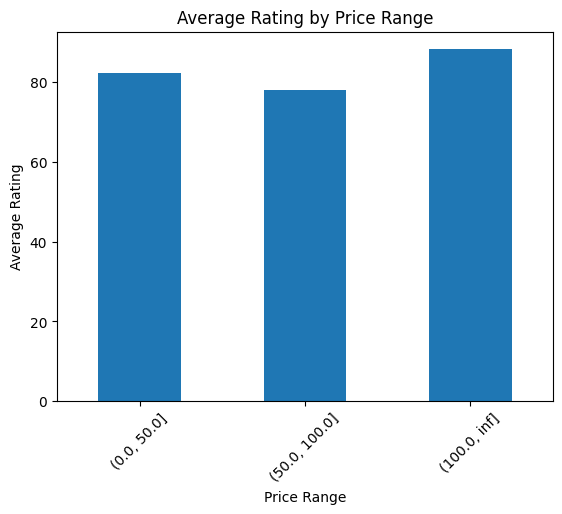

In [41]:
avg_rating_by_price_range = df.groupby(pd.cut(df['Price'], bins=[0, 50, 100, float('inf')]))['Rating'].mean()
print(average_price)
avg_rating_by_price_range.plot(kind='bar')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

10.What is the name of the item with the highest price in the dataset?

In [42]:
max_price_item = df.loc[df['Price'].idxmax()]
print("Name of the item with the highest price :", max_price_item['Name'])

Name of the item with the highest price : حافظة بطارية من فكرا لموبايل ايفون 14 برو ماكس/ ايفون 14 بلس، 4500 مللي أمبير في الساعة، جراب حماية محمول قابل لإعادة الشحن بظهر ممتد لموبايل ايفون 14 برو ماكس، 6.7 انش، بلاستيك، أسود


11.What is the name of the item with the highest rating in the dataset?


In [43]:
max_rating_item = df.loc[df['Rating'].idxmax()]

print("Name of the item with the highest rating:", max_rating_item['Name'])

Name of the item with the highest rating: بنطلون جيه جيه جيه بول جيه جيه فليك ايه كيه ام 542 للرجال من جاك اند جونز
